In [1]:
import matplotlib.pyplot as plt
import pygimli as pg 
import numpy as np
import pygimli.meshtools as mt
from pygimli.physics import ert

In [16]:
for_1 = mt.createCube(size=[40, 20, 20],pos=[0, 0,10],boundaryMarker=1)
for_2 = mt.createCube(size=[15, 15, 8], pos=[-10, 0,10],boundaryMarker=2)
for_area = for_1 + for_2
ax,_=pg.show(for_area, alpha=0.3,markers=True)

In [18]:
n_sensor = 40
sensor = np.zeros((n_sensor, 3))
sensor[0:, 0] =np.linspace(10,-10, n_sensor)
sensor[0:,2]=20

for pos in sensor:
    for_area.createNode(pos)
    for_area.createNode(pos - [0.01,0.01,0.01])

mesh_forward = mt.createMesh(for_area,area=5) 
print(np.unique(mesh_forward.cellMarkers()))

[1]


In [11]:
rhomap=[[1, 300],
        [2, 100]]
rhovec = pg.solver.parseArgToArray(rhomap, mesh_forward.cellCount(), mesh=mesh_forward)
ax, _ = pg.show(mesh_forward,showMesh=True, hold=True)
#ax=drawSensors(plotter, sensor, diam=0.5, color='yellow')
ax, _ = pg.show(mesh_forward, rhovec, alpha=0.5,showMesh=True,filter={'clip':{'normal':(0, 0.05, 0),'origin':(0, 0, 0)}})

18/04/23 - 09:18:20 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 2 within mesh.


In [15]:
np.unique(mesh_forward.cellMarkers())

array([1])

In [7]:
scheme = ert.createData(sensor,schemeName='dd')


In [4]:
data = ert.simulate(mesh_forward, scheme=scheme, res=rhomap, noiseLevel=1,
                    noiseAbs=1e-6, seed=1337
                   )

18/04/23 - 09:13:50 - pyGIMLi - WARNING - parseMapToCellArray: cannot find marker 2 within mesh.
18/04/23 - 09:13:50 - pyGIMLi - INFO - Calculate geometric factors.


relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.01000002282291931 : 0.01049595427777675


(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x23902de63a0>)

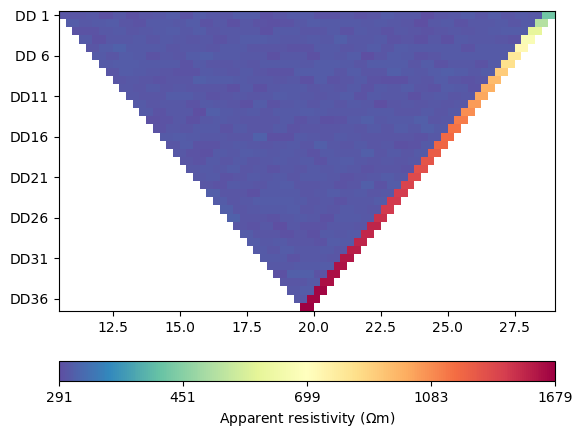

In [19]:
ert.show(data)

In [ ]:
plt.plot(data['rhoa'])
plt.xlabel('x')      
plt.ylabel('y')

In [ ]:
re_1 = mt.createCube(size=[40, 20, 20],pos=[0,0,10])
re_area =re_1
mesh_inversion=mt.createMesh(re_area)
mgr = ert.ERTManager(data)
model_res = mgr.invert(mesh=mesh_inversion,verbose=True)